<img src="img/dsci511_header.png" width="600">

# Lecture 7: Basic data wrangling with Pandas

## Lecture learning objectives

- Inspect a dataframe with `df.head()`, `df.tail()`, `df.info()`, `df.describe()`.
- Obtain dataframe summaries with `df.info()` and `df.describe()`.
- Manipulate how a dataframe displays in Jupyter by modifying Pandas configuration options such as `pd.set_option("display.max_rows", n)`.
- Rename columns of a dataframe using the `df.rename()` function or by accessing the `df.columns` attribute.
- Modify the index name and index values of a dataframe using `.set_index()`, `.reset_index()` , `df.index.name`, `.index`.
- Use `df.melt()` and `df.pivot()` to reshape dataframes, specifically to make tidy dataframes.
- Combine dataframes using `df.merge()` and `pd.concat()` and know when to use these different methods.
- Apply functions to a dataframe `df.apply()` and `df.applymap()`
- Perform grouping and aggregating operations using `df.groupby()` and `df.agg()`.
- Perform aggregating methods on grouped or ungrouped objects such as finding the minimum, maximum and sum of values in a dataframe using `df.agg()`.
- Remove or fill missing values in a dataframe with `df.dropna()` and `df.fillna()`.

In [2]:
import numpy as np
import pandas as pd

## DataFrame characteristics

- Last lecture we looked at how we can create dataframes
- Let's now look at some helpful ways we can view our dataframe

### Head/Tail

- The `.head()` and `.tail()` methods allow you to view the top/bottom *n* (default 5) rows of a dataframe
- Let's load in the [IMDB movie dataset](https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows) and try them out:

In [2]:
df = pd.read_csv('data/imdb.csv')
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


- The default return value is 5 rows, but we can pass in any number we like
- For example, let's take a look at the top 10 rows:

In [3]:
df.head(10)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0
6,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,107928762.0
7,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,96898818.0
8,Inception,3010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0
9,Fight Club,1999,A,139 min,Drama,8.8,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,37030102.0


- Or the bottom 5 rows:

In [4]:
df.tail()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN
999,The 39 Steps,1935,NaN,86 min,"Crime, Mystery, Thriller",7.6,93.0,Alfred Hitchcock,Robert Donat,Madeleine Carroll,Lucie Mannheim,Godfrey Tearle,51853,NaN


### DataFrame summaries

- Three very helpful attributes/functions for getting high-level summaries of your dataframe are:
    - `.shape`
    - `.info()`
    - `.describe()`

- `.shape` is just like the ndarray attribute we've seen previously
- It gives the shape (rows, cols) of your dataframe:

In [5]:
df.shape

(1000, 14)

- `.info()` prints information about the dataframe itself, such as dtypes, memory usages, non-null values, etc:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 109.5+ KB


- `.describe()` provides summary statistics of the values within a dataframe:

In [7]:
df.describe()

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,1992.221000,7.949300,77.971530,2.736929e+05,6.803475e+07
std,39.746924,0.275491,12.376099,3.273727e+05,1.097500e+08
min,1920.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,1999.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009.000000,8.100000,87.000000,3.741612e+05,8.075089e+07
max,3010.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


- By default, `.describe()` only print summaries of numeric features
- We can force it to give summaries on all features using the parameter `include='all'` (although they may not make sense!):

In [8]:
df.describe(include='all')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,1000,1000.000000,899,1000,1000,1000.000000,843.000000,1000,1000,1000,1000,1000,1.000000e+03,8.310000e+02
unique,999,NaN,16,140,202,NaN,NaN,548,660,841,891,939,NaN,NaN
top,Drishyam,NaN,U,100 min,Drama,NaN,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,NaN
freq,2,NaN,234,23,85,NaN,NaN,14,12,7,5,4,NaN,NaN
mean,NaN,1992.221000,NaN,NaN,NaN,7.949300,77.971530,NaN,NaN,NaN,NaN,NaN,2.736929e+05,6.803475e+07
std,NaN,39.746924,NaN,NaN,NaN,0.275491,12.376099,NaN,NaN,NaN,NaN,NaN,3.273727e+05,1.097500e+08
min,NaN,1920.000000,NaN,NaN,NaN,7.600000,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,1.305000e+03
25%,NaN,1976.000000,NaN,NaN,NaN,7.700000,70.000000,NaN,NaN,NaN,NaN,NaN,5.552625e+04,3.253559e+06
50%,NaN,1999.000000,NaN,NaN,NaN,7.900000,79.000000,NaN,NaN,NaN,NaN,NaN,1.385485e+05,2.353089e+07
75%,NaN,2009.000000,NaN,NaN,NaN,8.100000,87.000000,NaN,NaN,NaN,NaN,NaN,3.741612e+05,8.075089e+07


In [9]:
df.dtypes

Series_Title      object
Released_Year      int64
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

### Displaying DataFrames

- Displaying your dataframes effectively can be an important part of your workflow
- If a dataframe has more than 60 rows, Pandas will only display the first 5 and last 5 rows:

In [12]:
pd.DataFrame(np.random.rand(100))

,0
0,0.744247
1,0.263363
2,0.768526
3,0.165556
4,0.464598
...,...
95,0.432811
96,0.892961
97,0.471189
98,0.926380


- For dataframes of less than 60 rows, Pandas will print the whole dataframe

In [13]:
pd.DataFrame(np.random.rand(25))

,0
0,0.787183
1,0.003919
2,0.024212
3,0.192288
4,0.130258
5,0.048594
6,0.263813
7,0.296004
8,0.040110
9,0.501091


- I find the 60 row threshold to be a little too much, I prefer something more like 20
- You can change the setting using `pd.set_option("display.max_rows", 20)` so that anything with more than 20 rows will be summarized by the first and last 5 rows as before:

In [14]:
pd.set_option("display.max_rows", 20)
pd.DataFrame(np.random.rand(21))

,0
0,0.491010
1,0.761559
2,0.021443
3,0.636295
4,0.318999
...,...
16,0.513767
17,0.130472
18,0.505953
19,0.900306


- There are also other display options you can change, such as how many columns are shown, how numbers are formatted, etc.
- See the [official documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#options-and-settings) for more
- Another display option I will point out is that Pandas allows you to style your tables, for example by highlighting negative values, or adding conditional colour maps to your dataframe
- Below I'll style values based on their value. You can see the [styling documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Styling) for more examples

In [15]:
test = pd.DataFrame(np.random.rand(10, 10))

test.style.background_gradient(cmap='rainbow')

,0,1,2,3,4,5,6,7,8,9
0,0.348273,0.160036,0.823338,0.854416,0.697852,0.956681,0.670991,0.808988,0.016198,0.728704
1,0.204308,0.778645,0.012538,0.698450,0.300424,0.276299,0.774279,0.816731,0.674220,0.346938
2,0.950271,0.162918,0.445642,0.317593,0.486447,0.002095,0.714127,0.030288,0.273092,0.761874
3,0.374083,0.010833,0.506338,0.022873,0.358593,0.390369,0.763054,0.162832,0.876156,0.969467
4,0.513606,0.834223,0.763556,0.408113,0.559582,0.636017,0.384546,0.094479,0.723166,0.128833
5,0.364326,0.357189,0.186564,0.622064,0.438268,0.730509,0.111516,0.350559,0.852693,0.797822
6,0.071492,0.935212,0.367317,0.036999,0.908324,0.442053,0.783274,0.633703,0.936160,0.452323
7,0.437979,0.904312,0.166173,0.715707,0.673339,0.167546,0.177456,0.631980,0.545558,0.357473
8,0.079726,0.578100,0.115254,0.727893,0.363278,0.404771,0.746195,0.660323,0.020045,0.624021
9,0.729717,0.930397,0.147152,0.955048,0.942504,0.768304,0.178813,0.759681,0.465156,0.554538


### Views vs copies

- In previous lectures we've discussed views ("looking" at a part of an existing object) and copies (making a new copy of the object in memory)
- These things get a little abstract with Pandas and "...it’s very hard to predict whether it will return a view or a copy" (that's a quote straight [from a dedicated section in the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy))
- Basically, it depends on the operation you are trying to perform, your dataframe's structure and the memory layout of the underlying array
- But don't worry, let me tell you all you need to know

- Firstly, the most common warning you'll encounter in Pandas is the `SettingWithCopy`, Pandas raises it as a warning that you might not be doing what you think you're doing
- Let's see an example: one of movies in our dataframe has an incorrect value in the `Released_Year` field:

In [16]:
df[df['Released_Year'] > 2021]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
8,Inception,3010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0


- Imagine we wanted to change this to `2010`
- You might do the following:

In [17]:
df[df['Released_Year'] > 2021]['Released_Year'] = 2010

/var/folders/qm/c_scj_0n7vj7r36900wc3j140000gn/T/ipykernel_96379/3246166880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Released_Year'] > 2021]['Released_Year'] = 2010


- Ah, there's that warning
- Did our dataframe get changed?

In [18]:
df[df['Released_Year'] > 2021]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
8,Inception,3010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0


- No it didn't, even though you probably thought it did
- What happened above is that `df[df['Released_Year'] > 2021]` was executed first and returned a copy of the dataframe, we can confirm by using `id()`:

In [19]:
print(f"The id of the original dataframe is:\t {id(df)}")
print(f" Theid of the indexed dataframe is:\t {id(df[df['Released_Year'] > 2021])}")

The id of the original dataframe is:	 4432976656
 Theid of the indexed dataframe is:	 5068105776


- We then tried to set a value on this new object by setting `['Released_Year'] = 2010`
- Pandas is warning us that we are doing that operation **on a copy of the original dataframe**, which is probably not what we want
- To fix this, you need to index in a single go, using `.loc[]` for example:

In [20]:
df.loc[df['Released_Year'] > 2021, 'Released_Year'] = 2010

- No error this time! And let's confirm the change:

In [21]:
df[df['Released_Year'] > 2021]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


- Right, no output. That's because the row with `Released_year` = `3010` doesn't exist anymore.
- Now let's retrieve the row we were trying to fix:

In [22]:
df[df['Series_Title'] == 'Inception']

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
8,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0


## Basic DataFrame manipulations

### Renaming columns

- We can rename columns two ways:
    1. Using `.rename()` (to selectively change column names)
    2. By setting the `.columns` attribute (to change all column names at once)

In [23]:
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


- Let's give it a go:

In [24]:
df.rename(columns={"Released_Year": "Year",
                   "Star1": "Actor1"})
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


- Wait? What happened? Nothing changed?

- In the code above we did actually rename columns of our dataframe but we didn't modify the dataframe inplace, we made a copy of it.

- There are generally two options for making permanent dataframe changes:
    - 1. Use the parameter `inplace=True`, e.g., `df.rename(..., inplace=True)`, available in most functions/methods
    - 2. Re-assign, e.g., `df = df.rename(...)`
- The Pandas team recommends **Method 2 (re-assign)**, for a [few reasons](https://www.youtube.com/watch?v=hK6o_TDXXN8&t=700) (mostly to do with how memory is allocated under the hood)

In [25]:
df = df.rename(columns={"Released_Year": "Year",
                        "Star1": "Actor1"})
df

,Series_Title,Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Actor1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


- If you wish to change all of the columns of a dataframe, you can do so by setting the `.columns` attribute

In [26]:
df.columns = [f"Column {_}" for _ in range(14)]
df

,Column 0,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


### Changing the index

- You can change the index labels of a dataframe in 3 main ways:

    1. Modify `df.index.name` to change the name of the index

    1. `.set_index()` to make one of the columns of the dataframe the index
    
    1. `.reset_index()` to move the current index as a column and to reset the index to the default `RangeIndex`, which gives integer labels starting from 0

    1. Directly modify the `.index` attribute

In [27]:
df

,Column 0,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


- Below I will set the index as `Column 1` and rename the index to "New Index"

In [28]:
df = df.set_index("Column 1")
df.index.name = "New Index"
df

,Column 0,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13
New Index,,,,,,,,,,,,,
1994,The Shawshank Redemption,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1972,The Godfather,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2008,The Dark Knight,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
1974,The Godfather: Part II,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
1957,12 Angry Men,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1961,Breakfast at Tiffany's,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
1956,Giant,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
1953,From Here to Eternity,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0


- I can send the index back to a column and have a default integer index using `.reset_index()`

In [29]:
df = df.reset_index()
df

,New Index,Column 0,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13
0,1994,The Shawshank Redemption,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,1972,The Godfather,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,2008,The Dark Knight,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,1974,The Godfather: Part II,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,1957,12 Angry Men,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1961,Breakfast at Tiffany's,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,1956,Giant,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,1953,From Here to Eternity,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,1944,Lifeboat,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


- Like with column names, we can also modify the index directly:

In [30]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [31]:
df.index = pd.RangeIndex(5000, 6000, 1)
df

,New Index,Column 0,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7,Column 8,Column 9,Column 10,Column 11,Column 12,Column 13
5000,1994,The Shawshank Redemption,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
5001,1972,The Godfather,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
5002,2008,The Dark Knight,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
5003,1974,The Godfather: Part II,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
5004,1957,12 Angry Men,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1961,Breakfast at Tiffany's,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
5996,1956,Giant,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
5997,1953,From Here to Eternity,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
5998,1944,Lifeboat,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


### Adding/Removing columns

- There are two main ways to add/remove columns of a dataframe

    1. Use `[]` to add columns

    1. Use `.drop()` to drop columns
    
- Let's re-read in a fresh copy of IMDB movie dataset:

In [32]:
df = pd.read_csv('data/imdb.csv')
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


- We can add a new column to a dataframe by simply using `[]` with a new column name and value(s)

In [33]:
df['RottenTomato_score'] = 0
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,RottenTomato_score
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0,0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,0
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,0
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0,0
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,0


In [37]:
df = df.drop(columns=['Certificate', 'Meta_score', 'Star3', 'Star4'])
df

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,Star2,No_of_Votes,Gross,RottenTomato_score
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,2343110,28341469.0,0
1,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,1620367,134966411.0,0
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,2303232,534858444.0,0
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,1129952,57300000.0,0
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,689845,4360000.0,0
...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115 min,"Comedy, Drama, Romance",7.6,Blake Edwards,Audrey Hepburn,George Peppard,166544,NaN,0
996,Giant,1956,201 min,"Drama, Western",7.6,George Stevens,Elizabeth Taylor,Rock Hudson,34075,NaN,0
997,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.6,Fred Zinnemann,Burt Lancaster,Montgomery Clift,43374,30500000.0,0
998,Lifeboat,1944,97 min,"Drama, War",7.6,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,26471,NaN,0


### Adding/Removing rows

- We can add rows to a dataframe by concatenating your existing dataframe with a new one. We'll learn about this later in this lecture.
  - There's a deprecated method for adding rows to a dataframe called `.append()`, so I won't show that here.

- We can remove rows from a dataframe using the `.drop()` method

- Here we drop all rows beyond the 5th row using `.drop()`:

In [40]:
df = pd.read_csv('data/imdb.csv')

In [42]:
df.drop(df.index[5:], axis=0)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


We can also drop rows indirectly by slicing the original dataframe and assign the result to a new one:

In [44]:
df2 = df.iloc[:3, :4]
df2

,Series_Title,Released_Year,Certificate,Runtime
0,The Shawshank Redemption,1994,A,142 min
1,The Godfather,1972,A,175 min
2,The Dark Knight,2008,UA,152 min


## DataFrame reshaping

### Tidy data

- [Tidy data](https://vita.had.co.nz/papers/tidy-data.pdf) is about "linking the structure of a dataset with its semantics (its meaning)"

- You've already looked at tidy data in 523

- It is defined by:

    1. Each variable forms a column

    1. Each observation forms a row

    1. Each type of observational unit forms a table
    
- Often you'll need to reshape a dataframe to make it tidy (or for some other purpose)
    
![](img/tidy.png)

Source: [r4ds](https://r4ds.had.co.nz/tidy-data.html#fig:tidy-structure)

### Wide vs. long tables

<img src="https://www.statology.org/wp-content/uploads/2021/12/wideLong1-1.png" width="600">

[Image source](https://www.statology.org/wp-content/uploads/2021/12/wideLong1-1.png)

### Melt and pivot

- Pandas `.melt()`, `.pivot()` and `.pivot_table()` can help reshape dataframes

  - `.melt()`: make wide data long (like `melt()` in R)

  - `.pivot()`: make long data wide (like `cast()` in R)
  
  - `.pivot_table()`: same as `.pivot()` but can handle multiple indexes

- The below data shows how many courses different instructors taught across different years:

In [45]:
df = pd.DataFrame({"Name": ["Arman", "Mike", "Tiffany", "Varada", "Joel"],
                   "2018": [1, 3, 4, 5, 3],
                   "2019": [2, 4, 3, 2, 1],
                   "2020": [5, 2, 4, 4, 3]})
df

,Name,2018,2019,2020
0,Arman,1,2,5
1,Mike,3,4,2
2,Tiffany,4,3,4
3,Varada,5,2,4
4,Joel,3,1,3


- Let's try to tidy the data with `.melt()`. We first have to know what exactly `.melt()` does, so let's apply it to our dataframe without any arguments:

In [46]:
df.melt()

,variable,value
0,Name,Arman
1,Name,Mike
2,Name,Tiffany
3,Name,Varada
4,Name,Joel
5,2018,1
6,2018,3
7,2018,4
8,2018,5
9,2018,3


- Think of `.melt()` as trying to make everything look like `key: value` pairs

- By default, `.melt()` takes each column name as a key and binds to with all column values

- Here we're interested in questions about each instructor, so we want the rows to be **identified** with instructor names

- This can be done using the **`id_vars`** parameter, which determines which column should be the **identifier**, i.e. the "key":

In [47]:
df.melt(id_vars="Name")

,Name,variable,value
0,Arman,2018,1
1,Mike,2018,3
2,Tiffany,2018,4
3,Varada,2018,5
4,Joel,2018,3
5,Arman,2019,2
6,Mike,2019,4
7,Tiffany,2019,3
8,Varada,2019,2
9,Joel,2019,1


Much better!

- The `value_vars` parameter allows us to select which specific variables we want to "melt" (if you don't specify `value_vars`, all non-identifier columns will be used)

- For example, below I'm only using the `2020` column:

In [48]:
df.melt(id_vars="Name", value_vars=["2020"])

,Name,variable,value
0,Arman,2020,5
1,Mike,2020,2
2,Tiffany,2020,4
3,Varada,2020,4
4,Joel,2020,3


We can also rename the `variable` column directly to what we like right in the `.melt()` method:

In [51]:
df.melt(id_vars="Name", value_vars=["2020", "2019"], var_name="Year")


,Name,Year,value
0,Arman,2020,5
1,Mike,2020,2
2,Tiffany,2020,4
3,Varada,2020,4
4,Joel,2020,3
5,Arman,2019,2
6,Mike,2019,4
7,Tiffany,2019,3
8,Varada,2019,2
9,Joel,2019,1


- Alright, now that we've learned how it works, let's keep all variables, but rename the `variable` and `value` columns:

In [55]:
df_melt = df.melt(id_vars="Name", var_name="Year", value_name="Num_Courses")
df_melt

,Name,Year,Num_Courses
0,Arman,2018,1
1,Mike,2018,3
2,Tiffany,2018,4
3,Varada,2018,5
4,Joel,2018,3
5,Arman,2019,2
6,Mike,2019,4
7,Tiffany,2019,3
8,Varada,2019,2
9,Joel,2019,1


- Sometimes, you may want to do the opposite. That is, make long data wide, which we can do with `.pivot()`

- When using `.pivot()` we need to specify the `index` to pivot on, and the `columns` that will be used to make the new columns of the wider dataframe:

In [57]:
df_pivot = df_melt.pivot(index="Name",
                         columns="Year",
                         values="Num_Courses"
                        )
df_pivot

Year,2018,2019,2020
Name,,,
Arman,1,2,5
Joel,3,1,3
Mike,3,4,2
Tiffany,4,3,4
Varada,5,2,4


- You'll notice that Pandas set our specified `index="Name"` parameter as the index of the new dataframe, and preserved the label of the columns

- We can easily remove these names and reset the index to make our dataframe look like it originally did

In [58]:
df_pivot.columns

Index(['2018', '2019', '2020'], dtype='object', name='Year')

In [59]:
df_pivot.columns.name = None
df_pivot = df_pivot.reset_index()
df_pivot

,Name,2018,2019,2020
0,Arman,1,2,5
1,Joel,3,1,3
2,Mike,3,4,2
3,Tiffany,4,3,4
4,Varada,5,2,4


- `.pivot()` will often get you what you want, but it won't work if you want to:

  - Use multiple indexes (next lecture)

  - Have duplicate index/column labels

- In these cases you'll have to use `.pivot_table()`

- I won't focus on it too much here because I'd rather you learn about `pivot()` first

In [49]:
df = pd.DataFrame(
    {
        "Name": ["Arman", "Arman", "Mike", "Mike"],
        "Department": ["CS", "STATS", "CS", "STATS"],
        "2018": [1, 2, 3, 1],
        "2019": [2, 3, 4, 2],
        "2020": [5, 1, 2, 2],
    }
)
df

,Name,Department,2018,2019,2020
0,Arman,CS,1,2,5
1,Arman,STATS,2,3,1
2,Mike,CS,3,4,2
3,Mike,STATS,1,2,2


In [50]:
df = df.melt(
    id_vars=["Name", "Department"],
    var_name="Year",
    value_name="Courses"
)
df

,Name,Department,Year,Courses
0,Arman,CS,2018,1
1,Arman,STATS,2018,2
2,Mike,CS,2018,3
3,Mike,STATS,2018,1
4,Arman,CS,2019,2
5,Arman,STATS,2019,3
6,Mike,CS,2019,4
7,Mike,STATS,2019,2
8,Arman,CS,2020,5
9,Arman,STATS,2020,1


- In the above case, we have rows with the same `Name` and `Year` column, so **there is ambiguity** as to how multiple values should be handled.

- In this case, `.pivot()`  will throw a `ValueError: Index contains duplicate entries, cannot reshape`:

```python
# Throws error:

df.pivot(
    index="Name",
    columns="Year",
    values="Courses"
)
```

- We might want to circumvent this ambiguity by applying summarizing multiple values into one single value.

- `.pivot_table()` helps us handle such cases by accepts an `aggfunc` parameter, which we can use to specify an aggregation function to summarize multiple values:

In [53]:
df.pivot_table(
    index="Name",
    columns='Year',
    values='Courses',
    aggfunc='sum'  # additional parameter
)

Year,2018,2019,2020
Name,,,
Arman,3,5,6
Mike,4,6,4


- That's not the only we that we can handle this case.

- If we don't want to summarize multiple values into single values, we still have the option to keep all values by using **multiple or hierarchical indexes**.

- For example, we can specify both `Name` and `Department` as multiple indexes to remove ambiguity:

In [55]:
df.pivot_table(index=["Name", "Department"], columns='Year', values='Courses')

Year              2018  2019  2020
Name  Department                  
Arman CS             1     2     5
      STATS          2     3     1
Mike  CS             3     4     2
      STATS          1     2     2

- Read more about `pivot_table()` here in the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#pivot-tables)

## Working with multiple DataFrames

- Often you'll work with multiple dataframes that you want to stick together or merge
- `df.merge()` and `df.concat()` are all you need to know for combining dataframes
- The Pandas [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html) is very helpful for these functions, but they are pretty easy to grasp

### Sticking DataFrames together with `pd.concat()`

- You can use `pd.concat()` to stick dataframes together:
    - Vertically: if they have the same **columns**, OR
    - Horizontally: if they have the same **rows**

In [69]:
df1 = pd.DataFrame({'A': [1, 3, 5],
                    'B': [2, 4, 6]})
df1

,A,B
0,1,2
1,3,4
2,5,6


In [75]:
df2 = pd.DataFrame({'A': [7, 9, 11],
                    'B': [8, 10, 12]})
df2

,A,B
0,7,8
1,9,10
2,11,12


In [76]:
pd.concat((df1, df2), axis=0)

,A,B
0,1,2
1,3,4
2,5,6
0,7,8
1,9,10
2,11,12


- Notice that the indexes were simply joined together? This may or may not be what you want

- To reset the index, you can specify the parameter `ignore_index=True`

In [72]:
pd.concat((df1, df2), axis=0, ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10
5,11,12


- Use `axis=1` to stick together horizontally

In [77]:
pd.concat((df1, df2), axis=1, ignore_index=True)

,0,1,2,3
0,1,2,7,8
1,3,4,9,10
2,5,6,11,12


- You are not limited to just two dataframes, you can concatenate as many as you want

In [78]:
pd.concat((df1, df2, df1, df2), axis=0, ignore_index=True)

,A,B
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10
5,11,12
6,1,2
7,3,4
8,5,6
9,7,8


### Joining DataFrames with `pd.merge()`

- `pd.merge()` is analogous to the "joining" operations you looked at in R

- Merging is more like SQL (we'll talk about this extensively in DSCI 513)

- You can use `df.merge()` to join dataframes based on shared `key` columns

- methods include:

    - "inner join"

    - "outer join"

    - "left join"
    
    - "right join"
    
- See this great [cheat sheet](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html#compare-with-sql-join) and [these great animations](https://github.com/gadenbuie/tidyexplain) for more insights

Let's use the following two dataframes to demonstrate how joining dataframes work:

![](img/join.png)

In [79]:
df1 = pd.DataFrame({"name": ['Magneto', 'Storm', 'Mystique', 'Batman', 'Joker', 'Catwoman', 'Hellboy'],
                    'alignment': ['bad', 'good', 'bad', 'good', 'bad', 'bad', 'good'],
                    'gender': ['male', 'female', 'female', 'male', 'male', 'female', 'male'],
                    'publisher': ['Marvel', 'Marvel', 'Marvel', 'DC', 'DC', 'DC', 'Dark Horse']})
                    
df2 = pd.DataFrame({'publisher': ['DC', 'Marvel', 'Image'],
                    'year_founded': [1934, 1939, 1992]})

- An "inner" join will return all rows of `df1` where matching values for "publisher" are found in `df2`:

In [80]:
pd.merge(df1, df2, how="inner", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939
1,Storm,good,female,Marvel,1939
2,Mystique,bad,female,Marvel,1939
3,Batman,good,male,DC,1934
4,Joker,bad,male,DC,1934
5,Catwoman,bad,female,DC,1934


![](img/inner_join.png)

- An "outer" join will return all rows of `df1` and `df2`, placing NaNs where information is unavailble

In [81]:
pd.merge(df1, df2, how="outer", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939.0
1,Storm,good,female,Marvel,1939.0
2,Mystique,bad,female,Marvel,1939.0
3,Batman,good,male,DC,1934.0
4,Joker,bad,male,DC,1934.0
5,Catwoman,bad,female,DC,1934.0
6,Hellboy,good,male,Dark Horse,NaN
7,NaN,NaN,NaN,Image,1992.0


![](img/outer_join.png)

- Return all rows from `df1` and all columns of `df1` and `df2`, populated where matches occur

In [82]:
pd.merge(df1, df2, how="left", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Magneto,bad,male,Marvel,1939.0
1,Storm,good,female,Marvel,1939.0
2,Mystique,bad,female,Marvel,1939.0
3,Batman,good,male,DC,1934.0
4,Joker,bad,male,DC,1934.0
5,Catwoman,bad,female,DC,1934.0
6,Hellboy,good,male,Dark Horse,NaN


![](img/left_join.png)

In [83]:
pd.merge(df1, df2, how="right", on="publisher")

,name,alignment,gender,publisher,year_founded
0,Batman,good,male,DC,1934
1,Joker,bad,male,DC,1934
2,Catwoman,bad,female,DC,1934
3,Magneto,bad,male,Marvel,1939
4,Storm,good,female,Marvel,1939
5,Mystique,bad,female,Marvel,1939
6,NaN,NaN,NaN,Image,1992


- There are many ways to specify the `key` to join dataframes on, you can join on index values, different, column names, etc.

- Another helpful parameter is `indicator` which will add a column to the result telling you where matches were found in the dataframes

In [84]:
pd.merge(df1, df2, how="outer", on="publisher", indicator=True)

,name,alignment,gender,publisher,year_founded,_merge
0,Magneto,bad,male,Marvel,1939.0,both
1,Storm,good,female,Marvel,1939.0,both
2,Mystique,bad,female,Marvel,1939.0,both
3,Batman,good,male,DC,1934.0,both
4,Joker,bad,male,DC,1934.0,both
5,Catwoman,bad,female,DC,1934.0,both
6,Hellboy,good,male,Dark Horse,NaN,left_only
7,NaN,NaN,NaN,Image,1992.0,right_only


- By the way, you can use `pd.concat()` to do a simple "inner" or "outer" join on multiple datadrames at once

- It's less flexible than merge, but can be useful sometimes (for example, in your lab this week!)

## More DataFrame operations

### Applying custom functions

- There will be times when you want to apply a function that is not built-in to Pandas

- For this, we also have methods:

    - `df.apply()`, applies a function column-wise or row-wise across a dataframe (the function must be able to accept/return an array)

    - `df.applymap()`, applies a function element-wise (for functions that accept/return single values at a time)
    
    - `series.apply()` and `series.map()`, same as above but for Pandas `Series`

- For example, say you want to use a numpy function on a column in your dataframe

In [15]:
df = pd.read_csv('data/YVR_weather_data.csv', usecols=range(0, 4))
df

,Date/Time,Year,Month,Mean Max Temp (°C)
0,Jan-37,1937,1,0.6
1,Feb-37,1937,2,5.2
2,Mar-37,1937,3,11.7
3,Apr-37,1937,4,11.9
4,May-37,1937,5,16.3
...,...,...,...,...
912,Feb-13,2013,2,7.8
913,Mar-13,2013,3,10.5
914,Apr-13,2013,4,12.8
915,May-13,2013,5,17.1


In [44]:
df.loc[:, 'Month':'Mean Max Temp (°C)'].apply(np.log)

,Month,Mean Max Temp (°C)
0,0.000000,-0.510826
1,0.693147,1.648659
2,1.098612,2.459589
3,1.386294,2.476538
4,1.609438,2.791165
...,...,...
912,0.693147,2.054124
913,1.098612,2.351375
914,1.386294,2.549445
915,1.609438,2.839078


- Or you may want to apply your own custom function

In [46]:
def convert_to_fahrenheit(x):
    return x * (9 / 5) + 32


df.loc[:, 'Month':'Mean Max Temp (°C)'].apply(convert_to_fahrenheit)

,Month,Mean Max Temp (°C)
0,33.8,33.08
1,35.6,41.36
2,37.4,53.06
3,39.2,53.42
4,41.0,61.34
...,...,...
912,35.6,46.04
913,37.4,50.90
914,39.2,55.04
915,41.0,62.78


- This may have been better as a lambda function...

In [21]:
df.loc[:, 'Mean Max Temp (°C)'].apply(lambda x: x * (9 / 5) + 32)

0      33.08
1      41.36
2      53.06
3      53.42
4      61.34
       ...  
912    46.04
913    50.90
914    55.04
915    62.78
916    66.74
Name: Mean Max Temp (°C), Length: 917, dtype: float64

- You can even use functions that require additional parameters

- Just specify the parameters in `.apply()`

In [22]:
def convert_temperature(x, to="absolute"):
    if to == "absolute":
        return x + 273.15
    elif to == "fahrenheit":
        return x * (9 / 5) + 32


df.loc[:, 'Mean Max Temp (°C)'].apply(convert_temperature, to="absolute")

0      273.75
1      278.35
2      284.85
3      285.05
4      289.45
        ...  
912    280.95
913    283.65
914    285.95
915    290.25
916    292.45
Name: Mean Max Temp (°C), Length: 917, dtype: float64

- Some functions only accept/return a scalar

In [23]:
int(3.141)

3

In [24]:
float([3.141, 10.345])

TypeError: float() argument must be a string or a real number, not 'list'

- For these, we need `.applymap()`

In [27]:
# Note that .applymap() expects a DataFrame object (not a Series)

df.loc[:, ['Mean Max Temp (°C)']].applymap(int)

,Mean Max Temp (°C)
0,0
1,5
2,11
3,11
4,16
...,...
912,7
913,10
914,12
915,17


- However, there are often "vectorized" versions of common functions like this already available, which are much faster

- In the case above, we can use `.astype()` to change the dtype of a whole column quickly

In [94]:
time_applymap = %timeit  -q -o -r 3 df[['Mean Max Temp (°C)']].applymap(float)
time_builtin = %timeit  -q -o -r 3 df[['Mean Max Temp (°C)']].astype(float)

print(f"'astype' is {time_applymap.average / time_builtin.average:.2f} faster than 'applymap'!")

'astype' is 2.22 faster than 'applymap'!


### Grouping

- Often we are interested in examining specific groups in our data
- `df.groupby()` allows us to group our data based on a variable(s)
- Analgous to the `group_by` function in R

In [95]:
df = pd.read_csv('data/imdb.csv')
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


- Let's group this dataframe on the column `Name`

In [96]:
df.groupby(by='Genre')

- What is a `DataFrameGroupBy` object?

- It contains information about the groups of the dataframe

- The groupby object is really just a dictionary of index-mappings, which we could look at if we wanted to

In [104]:
df.groupby(by='Genre').groups

{'Action, Adventure': [63, 72, 155, 168, 840], 'Action, Adventure, Biography': [540], 'Action, Adventure, Comedy': [177, 320, 325, 339, 348, 473, 532, 722, 730, 887], 'Action, Adventure, Crime': [909], 'Action, Adventure, Drama': [5, 10, 13, 31, 39, 59, 343, 496, 625, 642, 709, 821, 898, 944], 'Action, Adventure, Family': [927], 'Action, Adventure, Fantasy': [16, 29, 109, 376, 623, 645], 'Action, Adventure, History': [507], 'Action, Adventure, Horror': [535], 'Action, Adventure, Mystery': [914], 'Action, Adventure, Romance': [564], 'Action, Adventure, Sci-Fi': [8, 60, 106, 223, 262, 357, 477, 479, 482, 493, 502, 582, 583, 634, 677, 737, 746, 749, 807, 839, 982], 'Action, Adventure, Thriller': [368, 725, 751, 861, 963], 'Action, Adventure, War': [854, 856], 'Action, Adventure, Western': [543, 865], 'Action, Biography, Crime': [142, 702, 985], 'Action, Biography, Drama': [57, 216, 217, 351, 659, 889, 924], 'Action, Comedy, Crime': [140, 160, 161, 294, 569, 908], 'Action, Comedy, Fantasy'

- We can also access a group using the `.get_group()` method

In [98]:
df.groupby(by='Genre').get_group('Action, Adventure')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
63,The Dark Knight Rises,2012,UA,164 min,"Action, Adventure",8.4,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099.0
72,Raiders of the Lost Ark,1981,A,115 min,"Action, Adventure",8.4,85.0,Steven Spielberg,Harrison Ford,Karen Allen,Paul Freeman,John Rhys-Davies,884112,248159971.0
155,Batman Begins,2005,UA,140 min,"Action, Adventure",8.2,70.0,Christopher Nolan,Christian Bale,Michael Caine,Ken Watanabe,Liam Neeson,1308302,206852432.0
168,Indiana Jones and the Last Crusade,1989,U,127 min,"Action, Adventure",8.2,65.0,Steven Spielberg,Harrison Ford,Sean Connery,Alison Doody,Denholm Elliott,692366,197171806.0
840,First Blood,1982,A,93 min,"Action, Adventure",7.7,61.0,Ted Kotcheff,Sylvester Stallone,Brian Dennehy,Richard Crenna,Bill McKinney,226541,47212904.0


- The usual thing to do, however, is to apply aggregation functions to the groupby object

In [114]:
df.groupby(by='Genre').mean()

/var/folders/qm/c_scj_0n7vj7r36900wc3j140000gn/T/ipykernel_96379/4142341026.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by='Genre').mean()


,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross
Genre,,,,,
"Action, Adventure",1993.800000,8.180000,71.800000,925533.400000,2.295072e+08
"Action, Adventure, Biography",1972.000000,7.900000,NaN,52397.000000,NaN
"Action, Adventure, Comedy",1999.200000,7.910000,66.857143,456076.600000,2.133793e+08
"Action, Adventure, Crime",2009.000000,7.600000,NaN,63882.000000,NaN
"Action, Adventure, Drama",1997.285714,8.150000,80.461538,663989.928571,2.224030e+08
...,...,...,...,...,...
"Mystery, Romance, Thriller",1958.000000,8.300000,100.000000,364368.000000,3.200000e+06
"Mystery, Sci-Fi, Thriller",1996.500000,7.800000,70.000000,383185.000000,3.575990e+07
"Mystery, Thriller",1987.000000,7.977778,78.600000,341362.888889,3.320600e+07


**Note:** As you can see, Pandas is complaining in the above line of code. It is decided by Pandas developers that calling aggregation methods such as `.mean()` on the entire dataframe should be avoided unless all columns are numerical, or you explicitly pass `numeric_only=True` to your aggregation method. Best practice is to select columns that contain the data you want first, then do `.groupby()` and apply aggregation:

In [115]:
df.loc[:, ['Genre', 'IMDB_Rating']].groupby(by='Genre').mean()

,IMDB_Rating
Genre,
"Action, Adventure",8.180000
"Action, Adventure, Biography",7.900000
"Action, Adventure, Comedy",7.910000
"Action, Adventure, Crime",7.600000
"Action, Adventure, Drama",8.150000
...,...
"Mystery, Romance, Thriller",8.300000
"Mystery, Sci-Fi, Thriller",7.800000
"Mystery, Thriller",7.977778


- We can apply multiple functions using `.aggregate()`

In [120]:
(
    df
    .loc[:, ['Genre', 'IMDB_Rating', 'Meta_score', 'No_of_Votes']]
    .groupby(by='Genre')
    .aggregate(['mean', 'sum', 'count'])
)

IMDB_Rating               Meta_score          \
                                    mean    sum count        mean     sum   
Genre                                                                       
Action, Adventure               8.180000   40.9     5   71.800000   359.0   
Action, Adventure, Biography    7.900000    7.9     1         NaN     0.0   
Action, Adventure, Comedy       7.910000   79.1    10   66.857143   468.0   
Action, Adventure, Crime        7.600000    7.6     1         NaN     0.0   
Action, Adventure, Drama        8.150000  114.1    14   80.461538  1046.0   
...                                  ...    ...   ...         ...     ...   
Mystery, Romance, Thriller      8.300000    8.3     1  100.000000   100.0   
Mystery, Sci-Fi, Thriller       7.800000   15.6     2   70.000000   140.0   
Mystery, Thriller               7.977778   71.8     9   78.600000   393.0   
Thriller                        7.800000    7.8     1   81.000000    81.0   
Western                         8.350000   33.4     4   78.250000   313.0   

                                      No_of_Votes                 
                             count           mean      sum count  
Genre                                                             
Action, Adventure                5  925533.400000  4627667     5  
Action, Adventure, Biography     0   52397.000000    52397     1  
Action, Adventure, Comedy        7  456076.600000  4560766    10  
Action, Adventure, Crime         0   63882.000000    63882     1  
Action, Adventure, Drama        13  663989.928571  9295859    14  
...                            ...            ...      ...   ...  
Mystery, Romance, Thriller       1  364368.000000   364368     1  
Mystery, Sci-Fi, Thriller        2  383185.000000   766370     2  
Mystery, Thriller                5  341362.888889  3072266     9  
Thriller                         1   27733.000000    27733     1  
Western                          4  322416.250000  1289665     4  

[202 rows x 9 columns]

- And even apply different functions to different columns

In [121]:
def num_range(x):
    return x.max() - x.min()


df.groupby(by="Genre").aggregate(
    {
        "Meta_score": ["max", "min", "mean", num_range],
        "Gross": ["sum"]
    }
)

Meta_score                               \
                                    max    min        mean num_range   
Genre                                                                  
Action, Adventure                  85.0   61.0   71.800000      24.0   
Action, Adventure, Biography        NaN    NaN         NaN       NaN   
Action, Adventure, Comedy          76.0   60.0   66.857143      16.0   
Action, Adventure, Crime            NaN    NaN         NaN       NaN   
Action, Adventure, Drama           98.0   61.0   80.461538      37.0   
...                                 ...    ...         ...       ...   
Mystery, Romance, Thriller        100.0  100.0  100.000000       0.0   
Mystery, Sci-Fi, Thriller          74.0   66.0   70.000000       8.0   
Mystery, Thriller                 100.0   52.0   78.600000      48.0   
Thriller                           81.0   81.0   81.000000       0.0   
Western                            90.0   69.0   78.250000      21.0   

                                     Gross  
                                       sum  
Genre                                       
Action, Adventure             1.147536e+09  
Action, Adventure, Biography  0.000000e+00  
Action, Adventure, Comedy     1.920414e+09  
Action, Adventure, Crime      0.000000e+00  
Action, Adventure, Drama      2.668836e+09  
...                                    ...  
Mystery, Romance, Thriller    3.200000e+06  
Mystery, Sci-Fi, Thriller     7.151979e+07  
Mystery, Thriller             1.992360e+08  
Thriller                      1.755074e+07  
Western                       5.822151e+07  

[202 rows x 5 columns]

- By the way, you can use aggregate for non-grouped dataframes too
- This is pretty much what `df.describe` does under the hood

In [124]:
(
    df
    .loc[:, ['IMDB_Rating', 'Meta_score', 'No_of_Votes']]
    .agg(['mean', 'min', 'count', num_range])
)

,IMDB_Rating,Meta_score,No_of_Votes
mean,7.9493,77.97153,273692.911
min,7.6000,28.00000,25088.000
count,1000.0000,843.00000,1000.000
num_range,1.7000,72.00000,2318022.000


### Dealing with missing values

- Missing values are typically denoted with `NaN`

- We can use `df.isna()` or `df.isnull()` to find missing values in a dataframe (both functions do exactly the same thing!)

- It returns a boolean for each element in the dataframe

In [125]:
df.isna()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,False,False,False,False,True
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,True,False,False,False,False,False,False,False,False,False,False,True


- But it's usually more helpful to get this information by row or by column using the `.any()` or `.info()` method

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 109.5+ KB


In [128]:
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996     True
997    False
998     True
999     True
Length: 1000, dtype: bool

In [129]:
mask = df.isnull().any(axis=1)
df[mask]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN
20,Soorarai Pottru,2020,U,153 min,Drama,8.6,NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
30,Seppuku,1962,NaN,133 min,"Action, Drama, Mystery",8.6,85.0,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,NaN
32,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.6,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,NaN
46,Hotaru no haka,1988,U,89 min,"Animation, Drama, War",8.5,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Blowup,1966,A,111 min,"Drama, Mystery, Thriller",7.6,82.0,Michelangelo Antonioni,David Hemmings,Vanessa Redgrave,Sarah Miles,John Castle,56513,NaN
995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,Giant,1956,G,201 min,"Drama, Western",7.6,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


- When you have missing values, we usually either drop them or impute them

- You'll learn more about imputing in DSCI 562/571/573

- For now, you can drop missing values using `df.dropna()`

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   int64  
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Meta_score     843 non-null    float64
 7   Director       1000 non-null   object 
 8   Star1          1000 non-null   object 
 9   Star2          1000 non-null   object 
 10  Star3          1000 non-null   object 
 11  Star4          1000 non-null   object 
 12  No_of_Votes    1000 non-null   int64  
 13  Gross          831 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 109.5+ KB


In [131]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 997
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   714 non-null    object 
 1   Released_Year  714 non-null    int64  
 2   Certificate    714 non-null    object 
 3   Runtime        714 non-null    object 
 4   Genre          714 non-null    object 
 5   IMDB_Rating    714 non-null    float64
 6   Meta_score     714 non-null    float64
 7   Director       714 non-null    object 
 8   Star1          714 non-null    object 
 9   Star2          714 non-null    object 
 10  Star3          714 non-null    object 
 11  Star4          714 non-null    object 
 12  No_of_Votes    714 non-null    int64  
 13  Gross          714 non-null    float64
dtypes: float64(3), int64(2), object(9)
memory usage: 83.7+ KB


- Or you can fill them using `.fillna()`
- This method has various options for filling, you can use a fixed value, the mean of the column, the previous non-nan value, etc
- You'll use this method more in the machine learning courses

In [6]:
df = pd.DataFrame([[np.nan, 2, np.nan, 0],
                   [3, 4, np.nan, 1],
                   [np.nan, np.nan, np.nan, 5],
                   [np.nan, 3, np.nan, 4]],
                  columns=list('ABCD'))
df

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [7]:
df.fillna(0)  # fill with 0

,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [8]:
df.fillna(df.mean())  # fill with column mean

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,3.0,NaN,5
3,3.0,3.0,NaN,4


In [9]:
df.fillna(method='bfill')  # backward (upwards) propagate last valid value

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5
3,NaN,3.0,NaN,4


In [10]:
df.fillna(method='ffill')  # forward (downward) propagate last valid value

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,4.0,NaN,5
3,3.0,3.0,NaN,4


- Finally, sometimes I use visualizations to help identify (patterns in) missing values

- One thing I often do is print a heatmap of my dataframe to get a feel for where my missing values are

- If you want to run this code, you may need to install `seaborn`:

```shell
conda install seaborn
```

In [11]:
import seaborn as sns
sns.set(rc={'figure.figsize': (7, 7)})

<AxesSubplot: >

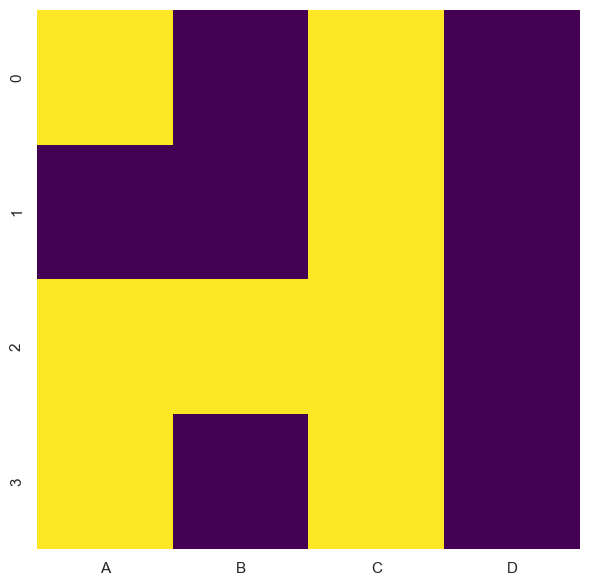

In [12]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

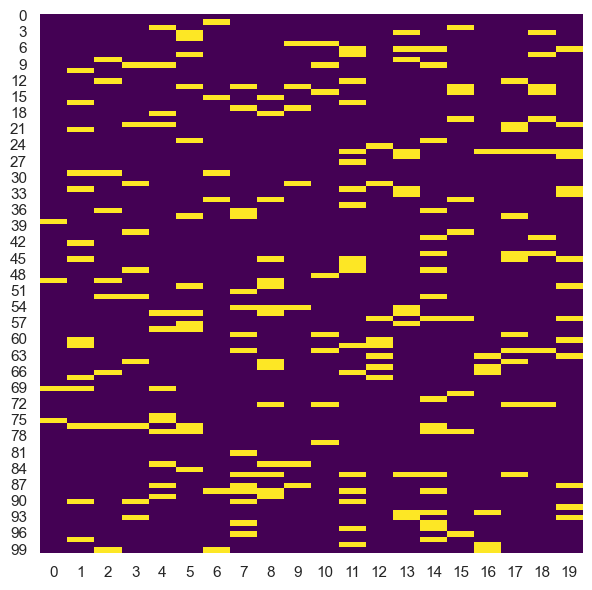

In [13]:
# Generate a larger synthetic dataset for demonstration
np.random.seed(2020)
npx = np.zeros((100,20))
mask = np.random.choice([True, False], npx.shape, p=[.1, .9])
npx[mask] = np.nan

sns.heatmap(pd.DataFrame(npx).isnull(), cmap='viridis', cbar=False);